In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 200)
## to make it possible to display multiple output inside one cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
hot = OneHotEncoder()
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

**Background**: You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

**Objective**: The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - \$650K and above.
The questions have been provided later in the document for which you can use tableau.

**Data**: The data set consists of information on some 22,000 properties.  The dataset consisted of historic data of houses sold between May 2014 to May 2015.
These are the definitions of data points provided:
(You can find more detailed explanation in this [Link](https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/))

- **Id**: Unique identification number for the property.
- **date**: date the house was sold.
- **price**: price of the house.
- **waterfront**: house which has a view to a waterfront.
- **condition**: How good the condition is (overall). **1** indicates worn out property and **5** excellent.
- **grade**: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
- **Sqft_above**: square footage of house apart from basement.
- **Sqft_living15**: Living room area in 2015(implies - some renovations). This might or might not have affected the lotsize area.
- **Sqft_lot15**: lotSize area in 2015(implies - some renovations).

### Exploring the data

We encourage you to thoroughly understand your data and take the necessary steps to prepare your data for modeling before building exploratory or predictive models. Since this is a regression task, you can use linear regression  for building a model. You are also encouraged to use other models in your project if necessary.
To explore the data, you can use the techniques that have been discussed in class. Some of them include using the describe method, checking null values, using _matplotlib_ and _seaborn_ for developing visualizations.
The data has a number of categorical and numerical variables. Explore the nature of data for these variables before you start with the data cleaning process and then data pre-processing (scaling numerical variables and encoding categorical variables).
You can  also use tableau to visually explore the data further.

### Model

Build a regression model that best fits your data. You can use the measures of accuracies that have been discussed in class.

Framework DMAIC:
https://asq.org/quality-resources/dmaic#:~:text=Define%2C%20measure%2C%20analyze%2C%20improve%2C%20and%20control%20(DMAIC,phases%20shown%20in%20Figure%201

Zip code Map
https://www.zipdatamaps.com/98028

Define:
The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - $650K and above. The questions have been provided later in the document for which you can use tableau.

For this ends, we will create 2 regression models: 1 general and the other for high tier houses
Measure:
 

ToDos
3. Review outliers y data integrity
4. Review bedroom categorical conversion
5. Segmentar Seattle aun mas para crear una nueva variable

1. Remove duplicates by ID
2. Transform ft to m and review other required transformations
7. Speculation analysis: marginal increase in second and third sell per zip code / county OR house profile


3. Quitar year built y year remnovated DONE
6. Review inclusion of geo data DONE
8. List of counties per zip code DONE
5. Review year renovation to binary vs condition of house (categorical variable) DONE
5. Labeling cities DONE

Link to documentation about the data set: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

In [2]:
#df = pd.read_csv("C:/Users/fprie/OneDrive/Dokumente/GitHub/MidTermProject/kc_house_data.csv") ruta Fabian
df = pd.read_csv("kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# Measure phase

## Numerical variables

In [12]:
numerical = df.iloc[:,[2,3,4,5,6,7,12,13,14,15,19,20]].reset_index(drop=True)
numerical.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,1680,0,1987,0,1800,7503


## Distribution of Numerical variables & X's vs Y plotting

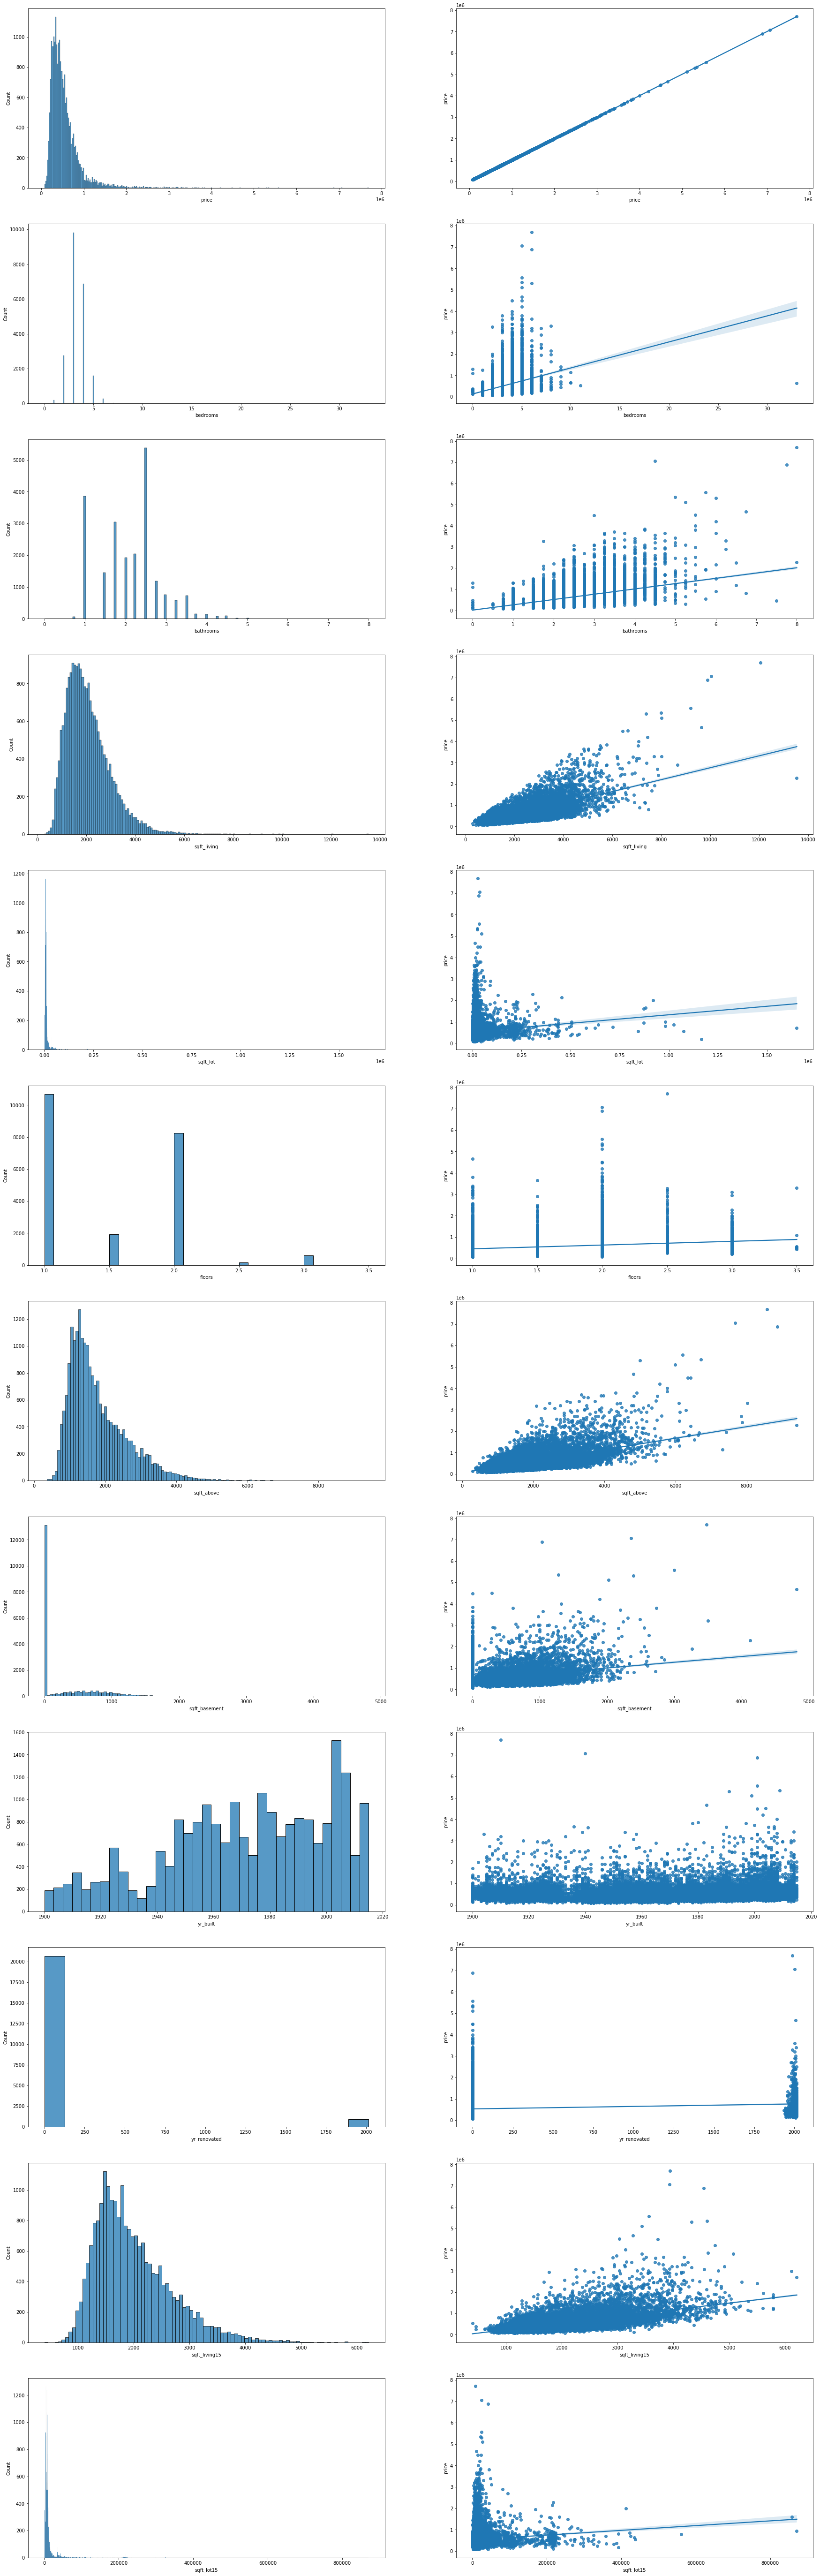

In [36]:
plt.subplots(figsize=(30, 100));
count=1
for i in numerical:
    plt.subplot(12,2,count);
    sns.histplot(numerical[i]);
    plt.subplot(12,2,count+1);
    sns.regplot(x=numerical[i],y=numerical.price);
    count+=2
plt.show();

## Correlation of Numerical variables

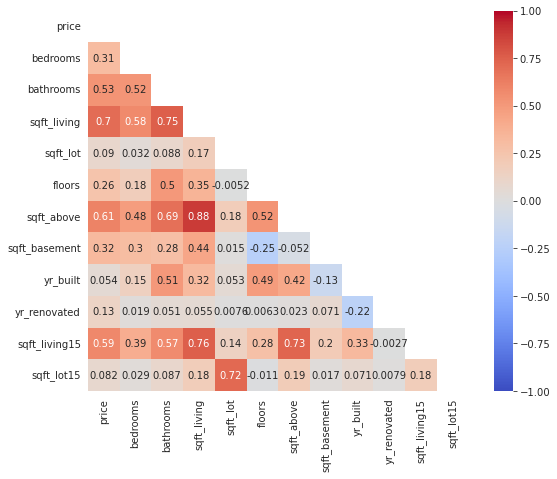

In [37]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

**sqft_above is highly correlated with sqft_living (.88)**

**sqft_living15 is highly correlated with sqft_living (.76)**

**sqft_lot15 is highly correlated with sqft_l0t (.72)**

In [40]:
#To verify that sqft_living = sqft_above + sqft_basement
(numerical["sqft_above"] + numerical["sqft_basement"]) - numerical["sqft_living"]

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Length: 21613, dtype: int64

**We remove ("sqft_above",'sqft_basement', "sqft_living15", "sqft_lot15")**

In [42]:
numerical = numerical.drop(["sqft_above",'sqft_basement', "sqft_living15", "sqft_lot15"], axis=1)
numerical

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,1951,1991
2,180000.0,2,1.00,770,10000,1.0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,1965,0
4,510000.0,3,2.00,1680,8080,1.0,1987,0
...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,2009,0
21609,400000.0,4,2.50,2310,5813,2.0,2014,0
21610,402101.0,2,0.75,1020,1350,2.0,2009,0
21611,400000.0,3,2.50,1600,2388,2.0,2004,0


## New Correlation

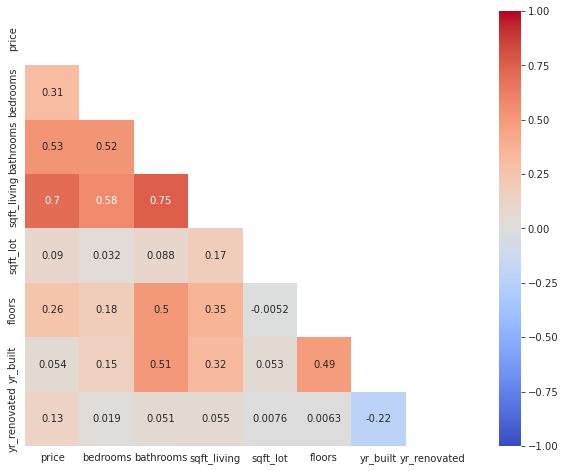

In [54]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(14, 8))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

## New variable ''condition_years"

In [63]:
time = df[["date", "yr_built", "yr_renovated"]]
time.head()

,date,yr_built,yr_renovated
0,20141013T000000,1955,0
1,20141209T000000,1951,1991
2,20150225T000000,1933,0
3,20141209T000000,1965,0
4,20150218T000000,1987,0


In [64]:
time["date"] = pd.to_datetime(time["date"])
time['year'] = time['date'].dt.year
#time['month'] = time['date'].dt.month
#time['day'] = time['date'].dt.day
time.head()

C:\Users\javie\AppData\Local\Temp/ipykernel_35300/3088125887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time["date"] = pd.to_datetime(time["date"])
C:\Users\javie\AppData\Local\Temp/ipykernel_35300/3088125887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['year'] = time['date'].dt.year


,date,yr_built,yr_renovated,year
0,2014-10-13,1955,0,2014
1,2014-12-09,1951,1991,2014
2,2015-02-25,1933,0,2015
3,2014-12-09,1965,0,2014
4,2015-02-18,1987,0,2015


In [66]:
time['condition_years']= np.where((time['yr_renovated'])>0, time['year']-time['yr_renovated'],time['year']-time['yr_built'] )
time.head()

C:\Users\javie\AppData\Local\Temp/ipykernel_35300/3691291001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['condition_years']= np.where((time['yr_renovated'])>0, time['year']-time['yr_renovated'],time['year']-time['yr_built'] )


,date,yr_built,yr_renovated,year,condition_years
0,2014-10-13,1955,0,2014,59
1,2014-12-09,1951,1991,2014,23
2,2015-02-25,1933,0,2015,82
3,2014-12-09,1965,0,2014,49
4,2015-02-18,1987,0,2015,28


In [67]:
numerical['condition_years'] = time['condition_years']
numerical.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,condition_years
0,221900.0,3,1.00,1180,5650,1.0,1955,0,59
1,538000.0,3,2.25,2570,7242,2.0,1951,1991,23
2,180000.0,2,1.00,770,10000,1.0,1933,0,82
3,604000.0,4,3.00,1960,5000,1.0,1965,0,49
4,510000.0,3,2.00,1680,8080,1.0,1987,0,28


#  1st - Linear Regresion - Numerical variables

In [71]:
X=numerical.drop('price', axis=1)
y=numerical.price

In [72]:
#First linear regression iteration, only numerical values

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

print(X_train_scaled)
print("--------")
print(X_test_scaled)

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

[[-0.39525584  1.79897315 -0.7722485  ...  1.18955273 -0.21187196
  -1.14030232]
 [ 0.67295166  0.82545436  0.23203361 ... -1.53121818 -0.21187196
   1.63677709]
 [ 0.67295166 -0.47257069  0.53768469 ... -0.44290982 -0.21187196
   0.56065881]
 ...
 [-1.46346333 -1.44608948 -0.47751354 ... -1.15711218 -0.21187196
   1.25492867]
 [-0.39525584  1.14996062 -0.56484241 ...  1.18955273 -0.21187196
  -1.14030232]
 [ 0.67295166  0.5009481   0.24294972 ...  1.39361054 -0.21187196
  -1.34858328]]
--------
[[ 0.67295166  0.5009481   0.45035581 ...  0.16926364 -0.21187196
  -0.09889755]
 [-1.46346333 -1.44608948 -0.65217129 ... -0.74899654 -0.21187196
   0.83836676]
 [-0.39525584  0.5009481   1.82578565 ...  1.01950454 -0.21187196
  -0.93202137]
 ...
 [ 0.67295166  1.14996062  1.1053224  ...  0.23728291 -0.21187196
  -0.13361104]
 [ 0.67295166 -0.47257069 -0.08453358 ... -1.53121818 -0.21187196
   1.63677709]
 [ 0.67295166  0.5009481   0.49402025 ...  0.23728291 -0.21187196
  -0.16832453]]
       

# Categorical variables

In [89]:
categorical = df.iloc[:,[0,1,8,9,10,11,16,17,18]].reset_index(drop=True)
categorical.head()

,id,date,waterfront,view,condition,grade,zipcode,lat,long
0,7129300520,20141013T000000,0,0,3,7,98178,47.5112,-122.257
1,6414100192,20141209T000000,0,0,3,7,98125,47.7210,-122.319
2,5631500400,20150225T000000,0,0,3,6,98028,47.7379,-122.233
3,2487200875,20141209T000000,0,0,5,7,98136,47.5208,-122.393
4,1954400510,20150218T000000,0,0,3,8,98074,47.6168,-122.045


In [90]:
categorical = categorical.drop(["id", "date"], axis=1)
categorical.head()

,waterfront,view,condition,grade,zipcode,lat,long
0,0,0,3,7,98178,47.5112,-122.257
1,0,0,3,7,98125,47.7210,-122.319
2,0,0,3,6,98028,47.7379,-122.233
3,0,0,5,7,98136,47.5208,-122.393
4,0,0,3,8,98074,47.6168,-122.045


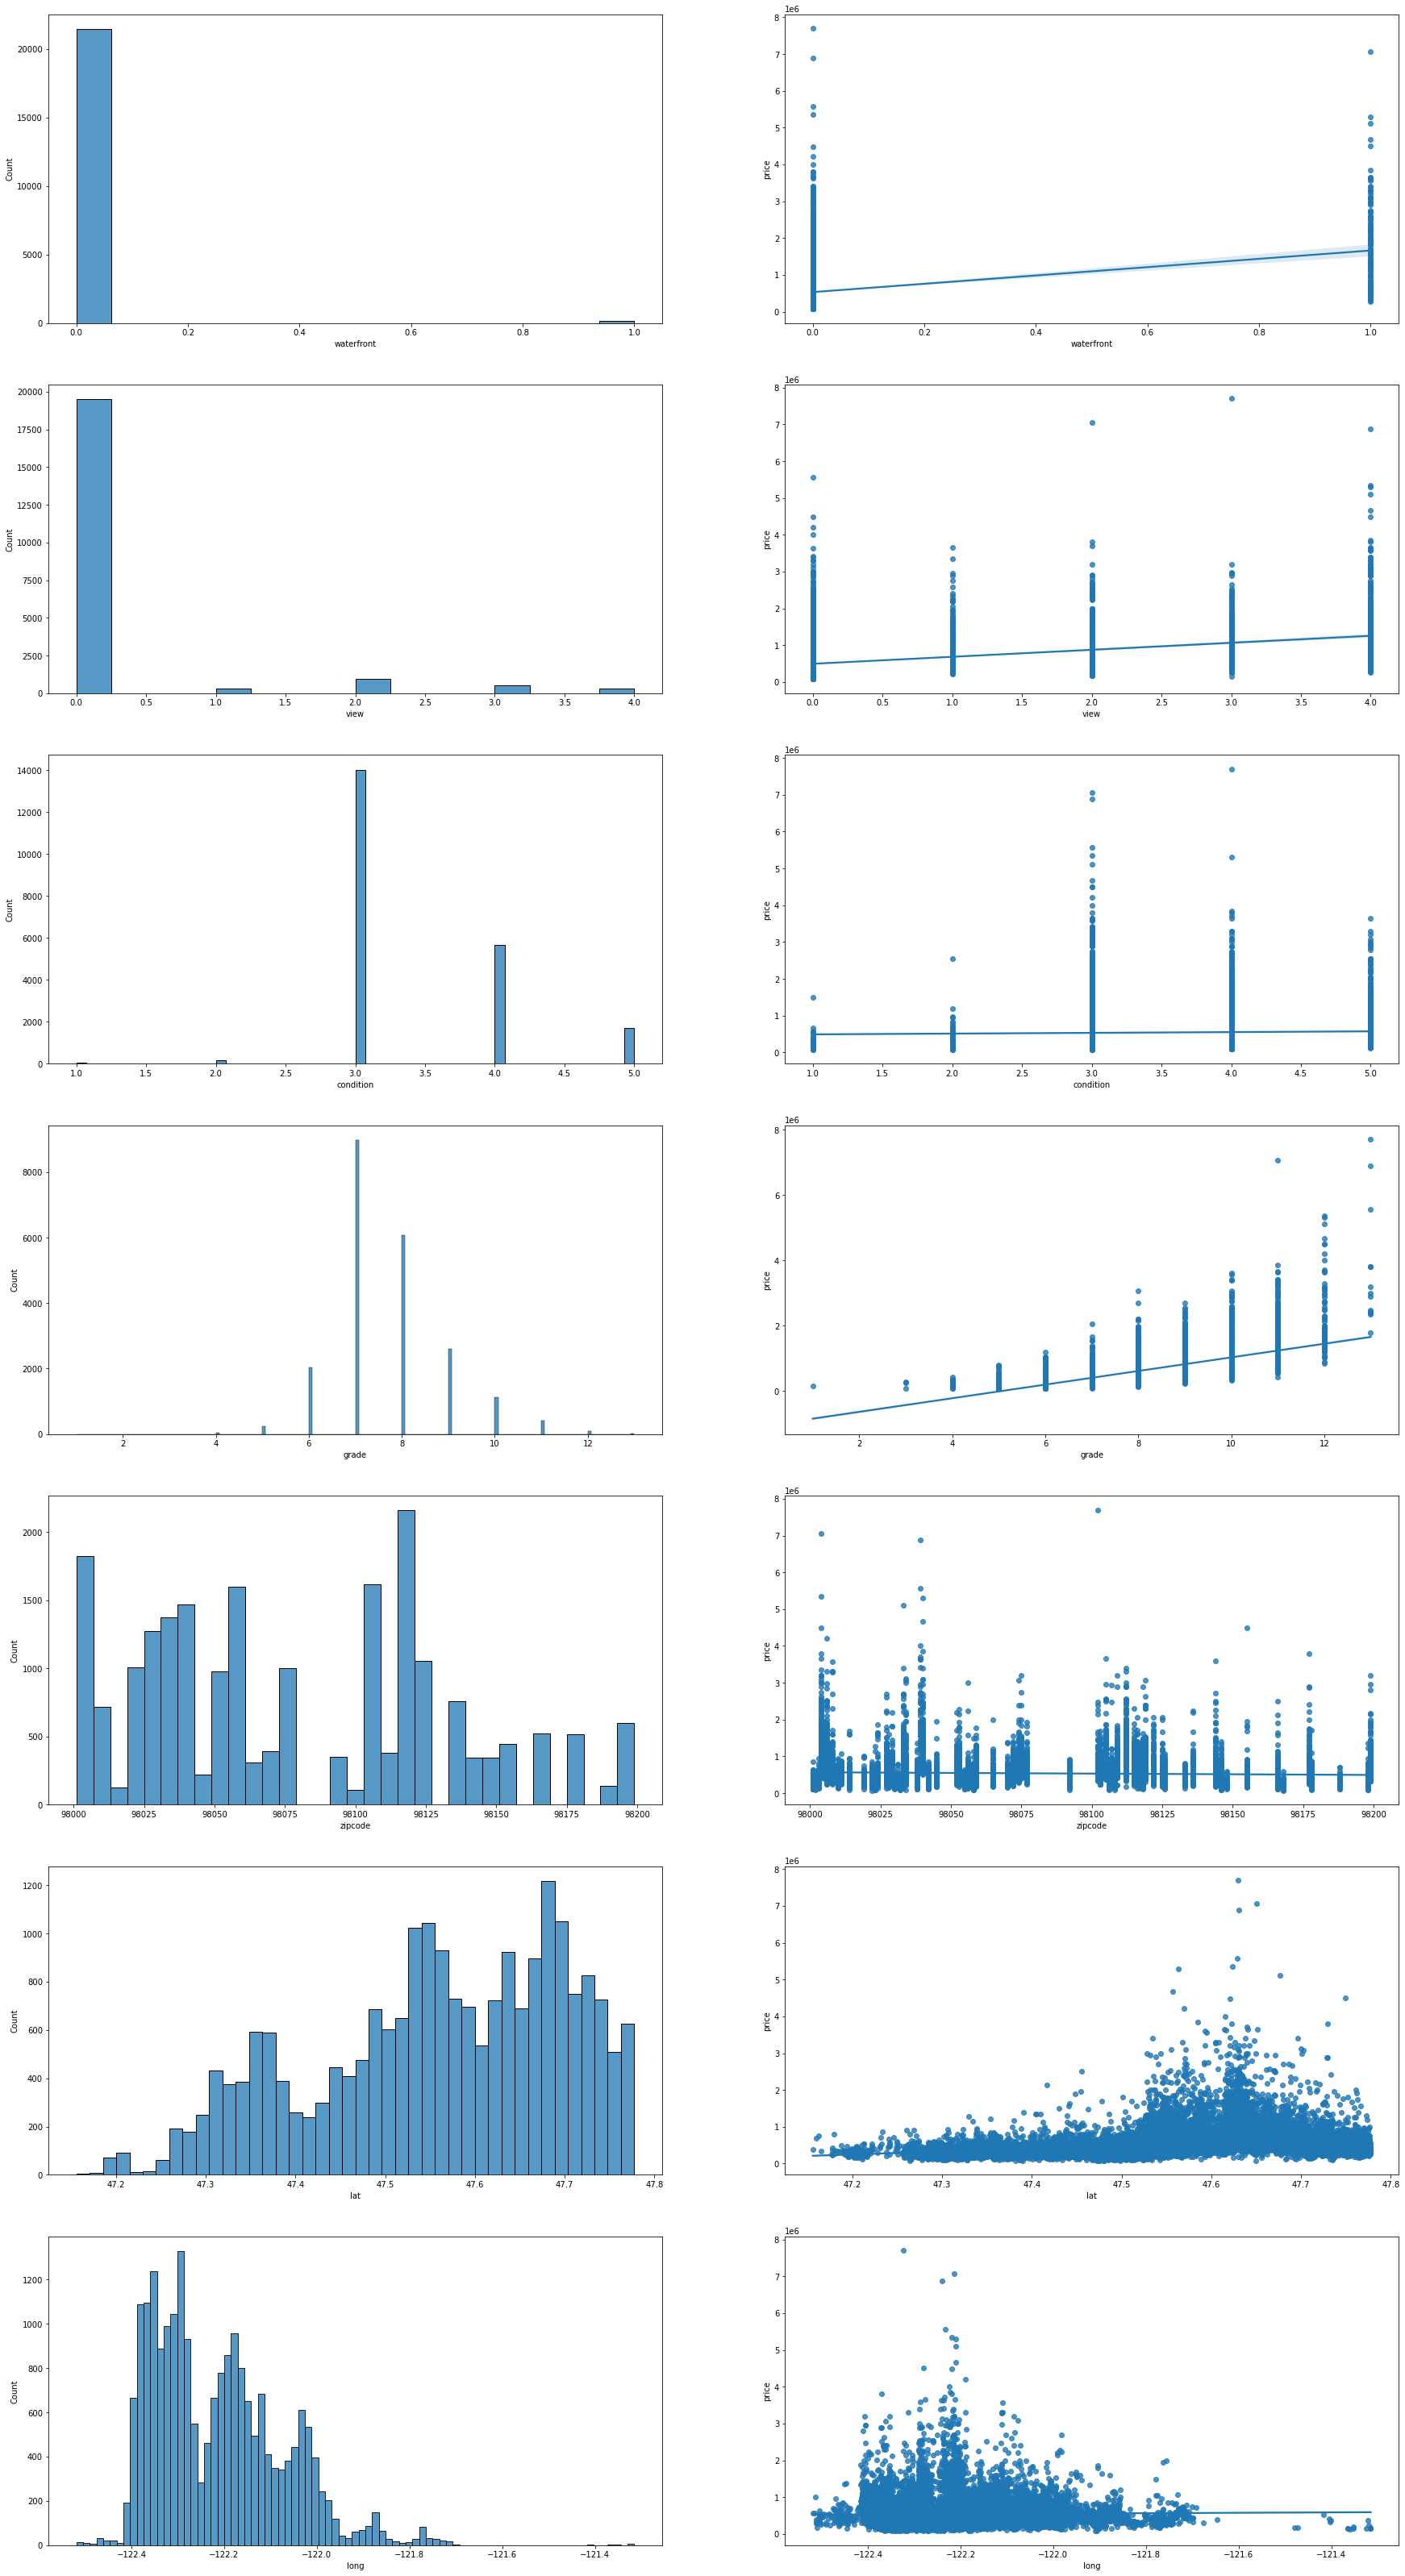

In [91]:
plt.subplots(figsize=(30, 100));
count=1
for i in categorical:
    plt.subplot(12,2,count);
    sns.histplot(categorical[i]);
    plt.subplot(12,2,count+1);
    sns.regplot(x=categorical[i],y=numerical.price);
    count+=2
plt.show();

#  2nd - Linear Regresion - Numerical variables + Categorical

In [101]:
X=pd.concat([numerical,categorical],axis=1)

In [102]:
X=X.drop('price', axis=1)
y=numerical.price
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,condition_years,waterfront,view,condition,grade,zipcode,lat,long
0,3,1.00,1180,5650,1.0,1955,0,59,0,0,3,7,98178,47.5112,-122.257
1,3,2.25,2570,7242,2.0,1951,1991,23,0,0,3,7,98125,47.7210,-122.319
2,2,1.00,770,10000,1.0,1933,0,82,0,0,3,6,98028,47.7379,-122.233
3,4,3.00,1960,5000,1.0,1965,0,49,0,0,5,7,98136,47.5208,-122.393
4,3,2.00,1680,8080,1.0,1987,0,28,0,0,3,8,98074,47.6168,-122.045


In [103]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

print(X_train_scaled)
print("--------")
print(X_test_scaled)

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

[[-0.39525584  1.79897315 -0.7722485  ...  0.70565164  0.02241309
  -1.22896545]
 [ 0.67295166  0.82545436  0.23203361 ...  0.68697687  0.82480059
  -0.79960629]
 [ 0.67295166 -0.47257069  0.53768469 ... -1.36724741  0.2527012
   0.29138829]
 ...
 [-1.46346333 -1.44608948 -0.47751354 ...  2.25565723  0.59306413
  -1.33454557]
 [-0.39525584  1.14996062 -0.56484241 ...  0.46287968  0.72196754
  -0.97557316]
 [ 0.67295166  0.5009481   0.24294972 ... -0.67628106 -1.45780356
   0.92486902]]
--------
[[ 0.67295166  0.5009481   0.45035581 ... -1.31122312  0.23459679
   0.68555408]
 [-1.46346333 -1.44608948 -0.65217129 ...  0.7243264   0.89432153
  -1.26415882]
 [-0.39525584  0.5009481   1.82578565 ... -0.07868855  0.51992231
   1.05156516]
 ...
 [ 0.67295166  1.14996062  1.1053224  ... -1.36724741  0.54454431
   0.38289106]
 [ 0.67295166 -0.47257069 -0.08453358 ...  0.8923993   0.0376208
  -1.13746268]
 [ 0.67295166  0.5009481   0.49402025 ... -1.25519882  1.56056386
   0.02391865]]
         

## martes 

In [163]:
reg2 = pd.concat([numerical,it1],axis=1)
reg2 = reg2.drop("condition_years", axis=1)
reg2["City_code"] = dfexp["City_code"]
reg2

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,waterfront,view,condition,grade,City_code
0,221900.0,3,1.00,5650,1.0,1180,0,1955,0,98178,0,0,3,7,0
1,538000.0,3,2.25,7242,2.0,2170,400,1951,1991,98125,0,0,3,7,0
2,180000.0,2,1.00,10000,1.0,770,0,1933,0,98028,0,0,3,6,0
3,604000.0,4,3.00,5000,1.0,1050,910,1965,0,98136,0,0,5,7,0
4,510000.0,3,2.00,8080,1.0,1680,0,1987,0,98074,0,0,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1131,3.0,1530,0,2009,0,98103,0,0,3,8,23
21609,400000.0,4,2.50,5813,2.0,2310,0,2014,0,98146,0,0,3,8,23
21610,402101.0,2,0.75,1350,2.0,1020,0,2009,0,98144,0,0,3,7,23
21611,400000.0,3,2.50,2388,2.0,1600,0,2004,0,98027,0,0,3,8,23


In [164]:
reg2['yr_renovated']= np.where((reg2['yr_renovated'])>0, 1,0 )
reg2.head()

,price,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,waterfront,view,condition,grade,City_code
0,221900.0,3,1.00,5650,1.0,1180,0,1955,0,98178,0,0,3,7,0
1,538000.0,3,2.25,7242,2.0,2170,400,1951,1,98125,0,0,3,7,0
2,180000.0,2,1.00,10000,1.0,770,0,1933,0,98028,0,0,3,6,0
3,604000.0,4,3.00,5000,1.0,1050,910,1965,0,98136,0,0,5,7,0
4,510000.0,3,2.00,8080,1.0,1680,0,1987,0,98074,0,0,3,8,0


In [165]:
X =reg2.drop('price', axis=1)
y=reg2.price
X

,bedrooms,bathrooms,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,waterfront,view,condition,grade,City_code
0,3,1.00,5650,1.0,1180,0,1955,0,98178,0,0,3,7,0
1,3,2.25,7242,2.0,2170,400,1951,1,98125,0,0,3,7,0
2,2,1.00,10000,1.0,770,0,1933,0,98028,0,0,3,6,0
3,4,3.00,5000,1.0,1050,910,1965,0,98136,0,0,5,7,0
4,3,2.00,8080,1.0,1680,0,1987,0,98074,0,0,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1131,3.0,1530,0,2009,0,98103,0,0,3,8,23
21609,4,2.50,5813,2.0,2310,0,2014,0,98146,0,0,3,8,23
21610,2,0.75,1350,2.0,1020,0,2009,0,98144,0,0,3,7,23
21611,3,2.50,2388,2.0,1600,0,2004,0,98027,0,0,3,8,23


In [166]:
#First linear regression iteration, only numerical values

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

X_test_scaled=std_scaler.transform(X_test)

print(X_train_scaled)
print("--------")
print(X_test_scaled)

X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()
print(print_model)

[[-0.39525584  1.79897315 -0.32634112 ... -0.62358292  0.30058047
  -0.89492057]
 [ 0.67295166  0.82545436 -0.21579039 ...  0.91744714 -0.55711133
  -0.40058277]
 [ 0.67295166 -0.47257069 -0.15496335 ...  0.91744714  0.30058047
  -0.89492057]
 ...
 [-1.46346333 -1.44608948 -0.23799709 ...  0.91744714 -0.55711133
   2.07110624]
 [-0.39525584  1.14996062 -0.32812731 ... -0.62358292  0.30058047
  -0.89492057]
 [ 0.67295166  0.5009481  -0.27118644 ... -0.62358292 -0.55711133
   2.56544405]]
--------
[[ 0.67295166  0.5009481  -0.1523082  ... -0.62358292  0.30058047
  -0.89492057]
 [-1.46346333 -1.44608948 -0.26503133 ... -0.62358292 -0.55711133
   1.08243064]
 [-0.39525584  0.5009481  -0.17473213 ... -0.62358292  1.15827227
  -0.89492057]
 ...
 [ 0.67295166  1.14996062  0.48309301 ... -0.62358292  1.15827227
  -0.89492057]
 [ 0.67295166 -0.47257069 -0.26696234 ...  2.4584772  -0.55711133
   1.08243064]
 [ 0.67295166  0.5009481  -0.18095966 ... -0.62358292 -0.55711133
   2.23588551]]
       

In [167]:
reg2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'waterfront',
       'view', 'condition', 'grade', 'City_code'],
      dtype='object')

# New variable - City_code

In [150]:
cities = pd.read_csv("zip.csv")
cities = cities.rename(columns={"Zipcode": "zipcode"})
cities = cities.drop("no", axis=1)
cities

,zipcode,City,County
0,98178,Seattle,King County
1,98125,Seattle,King County
2,98028,Kenmore,King County
3,98136,Seattle,King County
4,98074,Sammamish,King County
5,98053,Redmond,King County
6,98003,Federal Way,King County
7,98198,Seattle,King County
8,98146,Seattle,King County
9,98038,Maple Valley,King County


In [103]:
zipdf = df[["zipcode"]]
zipdf

,zipcode
0,98178
1,98125
2,98028
3,98136
4,98074
...,...
21608,98103
21609,98146
21610,98144
21611,98027


In [120]:
df_geo = pd.merge(zipdf, 
                      cities,
                      on ="zipcode", 
                      how ="inner")
df_geos = df_geo[["City", "County"]]

dfexp = pd.concat([df,df_geos],axis=1)
dfexp
dfexp.to_csv("paraluis.csv")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,County
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle,King County
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle,King County
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,Seattle,King County
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle,King County
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,Seattle,King County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,Medina,King County
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,Medina,King County
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,Medina,King County
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,Medina,King County


In [159]:
cityun= cities["City"]
cityunique = cityun.unique()

ran = []
for i in range(0,24):
    ran.append(i)
    
res = {cityunique[i]: ran[i] for i in range(len(cityunique))}
res

dfexp

{'Seattle': 0,
 'Kenmore': 1,
 'Sammamish': 2,
 'Redmond': 3,
 'Federal Way': 4,
 'Maple Valley': 5,
 'Bellevue': 6,
 'Duvall': 7,
 'Auburn': 8,
 'Mercer Island': 9,
 'Kent': 10,
 'Issaquah': 11,
 'Renton': 12,
 'Vashon': 13,
 'Kirkland': 14,
 'Black Diamond': 15,
 'North Bend': 16,
 'Woodinville': 17,
 'Snoqualmie': 18,
 'Enumclaw': 19,
 'Fall City': 20,
 'Bothell': 21,
 'Carnation': 22,
 'Medina': 23}

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,County
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle,King County
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle,King County
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,Seattle,King County
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle,King County
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,Seattle,King County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,Medina,King County
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,Medina,King County
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,Medina,King County
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,Medina,King County


In [160]:
dfexp['City_code']= dfexp['City'].replace(res)
dfexp

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,County,City_code
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,Seattle,King County,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle,King County,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,Seattle,King County,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,Seattle,King County,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,Seattle,King County,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,Medina,King County,23
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,Medina,King County,23
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,Medina,King County,23
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,Medina,King County,23


In [73]:
reg2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'condition_years',
       'waterfront', 'view', 'condition', 'grade'],
      dtype='object')